# **Content-Based Image Retrieval**
___


```Tugas Kedua | Temu Kembali Citra | Ir. Agus Eko Minarno, S.Kom., M.Kom. IPM.```

##### **1. Prepare Dataset**
```Mempersiapkan dataset untuk dilatih```

In [ ]:
# change directory to /tmp untuk konsistensi
%cd /tmp/

/tmp


In [1]:
! pip install opendatasets
import opendatasets as od
import pandas
od.download("https://www.kaggle.com/datasets/theaayushbajaj/cbir-dataset")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: ardhiapasya
Your Kaggle Key: ··········


100%|██████████| 232M/232M [00:17<00:00, 14.2MB/s]


##### **2. Data Prepocessing**
```Melatih dan menganalisa dataset, membuat model dari dataset yang sudah dilatih```

In [2]:
# import library yang dibutuhkan
import keras
from keras.utils import load_img, img_to_array
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
import numpy as np
from keras.applications.imagenet_utils import decode_predictions, preprocess_input
import matplotlib.pyplot as plt
from keras.models import Model
import os

In [3]:
import os
path = os.path.join('/content/cbir-dataset/dataset')

In [4]:
# init model VGG16 dan menampilkan summary
model = VGG16(weights='imagenet', include_top=True)
model.summary()

553467096/553467096 [==============================] - 35s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                           

In [5]:
# membuat fungsi untuk load citra
def load_image(path):
    img = load_img(path, target_size=model.input_shape[1:3])
    x = img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return img, x

shape of x:  (1, 224, 224, 3)
data type:  float32


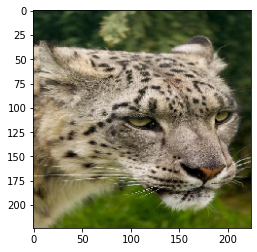

In [6]:
# menampilkan citra, shape dan tipe data nya
img, x = load_image("/content/cbir-dataset/dataset/1.jpg")
print("shape of x: ", x.shape)
print("data type: ", x.dtype)
plt.imshow(img)

In [7]:
# init predictions dari model VGG16 untuk menampilkan decode_predictions
predictions = model.predict(x)

for _, pred, prob in decode_predictions(predictions)[0]:
    print("diprediksi %s dengan kemungkinan %0.3f" % (pred, prob))

35363/35363 [==============================] - 0s 0us/step
diprediksi snow_leopard dengan kemungkinan 0.917
diprediksi leopard dengan kemungkinan 0.081
diprediksi lynx dengan kemungkinan 0.002
diprediksi cheetah dengan kemungkinan 0.000
diprediksi jaguar dengan kemungkinan 0.000


In [8]:
# init feature_extractor dari model VGG16 dan menampilkan summary
feature_extractor = Model(inputs=model.input, outputs=model.get_layer("fc2").output)
feature_extractor.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

1/1 [==============================] - 0s 17ms/step


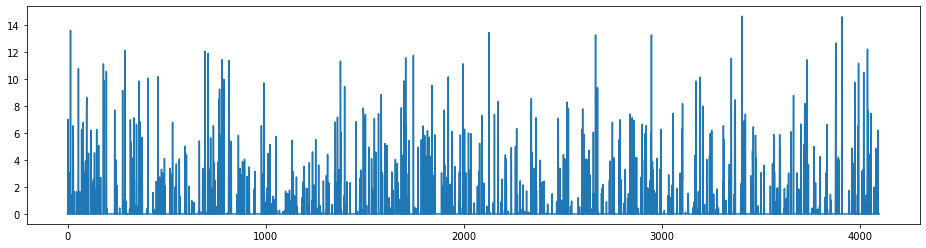

In [11]:
# menampilkan citra, ektraksi feature dan memvisualisasikan nya
img, x = load_image("/content/cbir-dataset/dataset/1.jpg")
feature = feature_extractor.predict(x)

plt.figure(figsize=(16,4))
plt.plot(feature[0])

In [12]:
# check total citra yang bisa di analisa
#images_path = "dataset/"
image_extensions = ['.jpg', '.png', '.jpeg']   # case-insensitive (upper/lower doesn't matter)
max_num_images = 10000

images = [os.path.join(dp, f) for dp, dn, filenames in os.walk(path) for f in filenames if os.path.splitext(f)[1].lower() in image_extensions]

print("terdapat %d citra yang bisa di analisa" % len(images))

terdapat 4738 citra yang bisa di analisa


In [14]:
# list untuk menyimpan fetures hasil proses ekstraksi dari semua citra dataset yang didapat dari feature_extractor (VGG16)
dataset_features = []

for i, path in enumerate(images):
    if i % 10 == 0:
        print("menganalisa citra %d / %d." % (i, len(images)))

    img, x = load_image(path);
    feat = feature_extractor.predict(x)[0]
    dataset_features.append(feat)

print("selesai meng-ekstrak feature untuk %d citra" % len(images))

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 17ms/step
menganalisa citra 200 / 4738.
1/1 [==============================] - 0s 18ms/step
menganalisa citra 210 / 4738.
1/1 [==============================] - 0s 17ms/step
menganalisa citra 220 / 4738.
1/1 [==============================] - 0s 17ms/step
menganalisa citra 230 / 4738.
1/1 [==============================] - 0s 16ms/step
menganalisa citra 240 / 4738.
1/1 [==============================] - 0s 17ms/step
menganalisa citra 250 / 4738.
1/1 [==============================] - 0s 18ms/step
menganalisa citra 260 / 4738.
1/1 [==============================] - 0s 18ms/step
menganalisa citra 270 / 4738.
1/1 [==============================] - 0s 22ms/step
menganalisa citra 280 / 4738.
1/1 [==============================] - 0s 16ms/step
menganalisa citra 290 / 4738.
1/1 [==============================] - 0s 16ms/step
menganalisa citra 300 / 4738.
1/1 [==============================] - 0s 17ms/

##### **3. Model Evaluation**
```Evaluasi dari model yang telah dibuat, testing model```

In [15]:
# import library yang diperlukan
from sklearn.decomposition import PCA
import random
from scipy.spatial import distance

In [16]:
# init final_dataset_features, pca dan fitting final_dataset_features
final_dataset_features = np.array(dataset_features)
pca = PCA(n_components=300)
pca.fit(final_dataset_features)

PCA(n_components=300)

In [17]:
# transform dari final_dataset_features ke pca_features
pca_features = pca.transform(final_dataset_features)

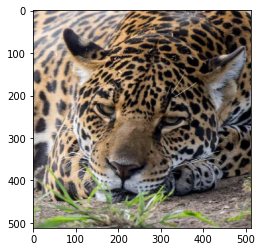

In [18]:
# pick random citra dan tes menampilkan nya
query_image_idx = int(len(images) * random.random())
img = load_img(images[query_image_idx])

plt.imshow(img)

In [19]:
# init query yang serupa untuk mencari query yang terdekat
similar_idx = [ distance.cosine(pca_features[query_image_idx], feat) for feat in pca_features ]

In [20]:
# init query yang terdekat dari query yang serupa
idx_closest = sorted(range(len(similar_idx)), key=lambda k: similar_idx[k])[1:6]

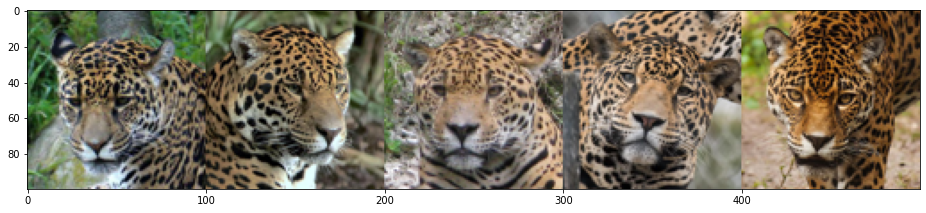

In [21]:
# testing query, dan menampilkan hasil dalam satu citra gabungan
concatenate_test = []

for idx in idx_closest:
    img = load_img(images[idx])
    img = img.resize((int(img.width * 100 / img.height), 100))
    concatenate_test.append(img)

concatenated_image = np.concatenate([np.asarray(t) for t in concatenate_test], axis=1)

plt.figure(figsize = (16,12))
plt.imshow(concatenated_image)

In [22]:
# membuat fungsi get_closest_images dari query index acak dan fungsi penggabungan citra
def get_closest_images(query_image_idx, num_results=10):
    distances = [ distance.cosine(pca_features[query_image_idx], feat) for feat in pca_features ]
    idx_closest = sorted(range(len(distances)), key=lambda k: distances[k])[1:num_results+1]
    return idx_closest

def get_concatenated_images(indexes, closest_test_height):
    closest_test = []
    for idx in indexes:
        img = load_img(images[idx])
        img = img.resize((int(img.width * closest_test_height / img.height), closest_test_height))
        closest_test.append(img)
    concatenated_image = np.concatenate([np.asarray(t) for t in closest_test], axis=1)
    return concatenated_image

Text(0.5, 1.0, 'hasil akhir berikut citra penggabungan citra')

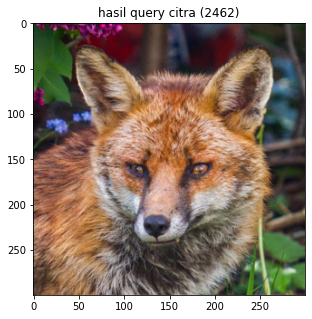

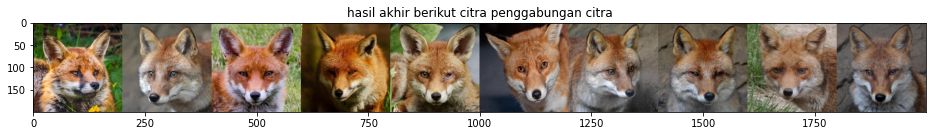

In [23]:
# test cbir dan menampilkannya (hasil query dan hasil penggabungan gambar)
query_image_idx = int(len(images) * random.random())
idx_closest = get_closest_images(query_image_idx)
query_image = get_concatenated_images([query_image_idx], 300)
results_image = get_concatenated_images(idx_closest, 200)

plt.figure(figsize = (5,5))
plt.imshow(query_image)
plt.title("hasil query citra (%d)" % query_image_idx)

plt.figure(figsize = (16,12))
plt.imshow(results_image)
plt.title("hasil akhir berikut citra penggabungan citra")

##### **4. Image Retrieval Testing**
```Live test dari citra yang diupload dan menampilkan hasil nya```

In [24]:
# import library yang dibutuhkan
from google.colab import files
from keras.preprocessing import image

Saving 1009.jpg to 1009.jpg
1/1 [==============================] - 0s 20ms/step


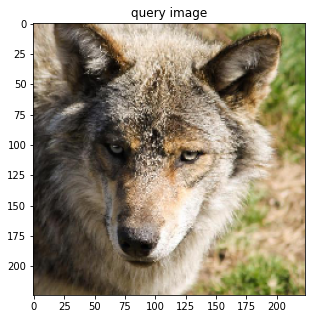

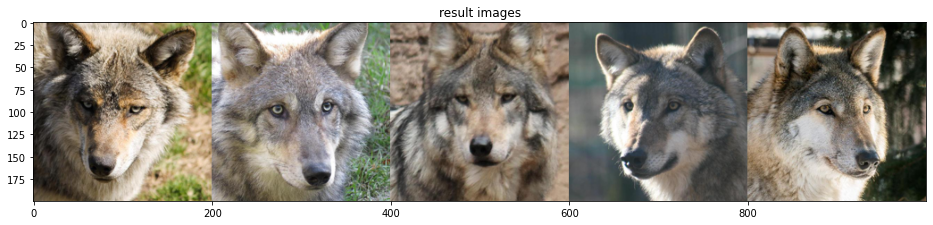

In [25]:
# unggah citra, proses feature ekstraksi dan pca, proses jarak terdekat, proses akhir yang digabungkan
uploaded = files.upload()
for fn in uploaded.keys():
  path = fn

new_image, x = load_image(path)
new_features = feature_extractor.predict(x)
new_pca_features = pca.transform(new_features)[0]

distances = [ distance.cosine(new_pca_features, feat) for feat in pca_features ]
idx_closest = sorted(range(len(distances)), key=lambda k: distances[k])[0:5]  # grab first 5
results_image = get_concatenated_images(idx_closest, 200)

plt.figure(figsize = (5,5))
plt.imshow(new_image)
plt.title("query image")

plt.figure(figsize = (16,12))
plt.imshow(results_image)
plt.title("result images")

os.remove(path)